## Developing Machine Learning Techniques:

In this notebook, First, I used the over-sampling, under-sampling techniques to handel the imblance data and then I created different machine learning methods to complete classification task. Based on pre-processing notebook the ratio between 0 label is 97 and 1 label is 3. In this notebook, `X_train` is the normalized training data and `X_train_res` is the oversample dataset, `X_train_under` is the undersample dataset. 

### Read the normal train-test data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
import umap
import imblearn

In [2]:
X_train = pd.read_csv('X_train_normal.csv')
y_train = pd.read_csv('y_train.csv')

X_test = pd.read_csv('X_test_normal.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
y_train = y_train.loc[:,'Call_Flag']
y_test = y_test.loc[:,'Call_Flag']

### Random Resampling Imbalanced Dataset 
1) OverSampling <br>
2) UnderSampling 

In [4]:
# Oversamping, increasing the ratio of label 1 in target dataset by oversamling:
import imblearn; imblearn.show_versions(github=True)
from imblearn.over_sampling import RandomOverSampler

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

print(sum(y_train==1)/len(y_train))
print(sum(y_test==1)/len(y_test))

oversample = RandomOverSampler(sampling_strategy=0.15)
X_train_res, y_train_res = oversample.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print(sum(y_train_res==1)/len(y_train_res))

Using TensorFlow backend.


<details><summary>System, Dependency Information</summary>

**System Information**

* python    : `3.7.6 (default, Jan  8 2020, 13:42:34)  [Clang 4.0.1 (tags/RELEASE_401/final)]`
* executable: `/Users/parinazfarajiparvar/opt/anaconda3/bin/python`
* machine   : `Darwin-19.6.0-x86_64-i386-64bit`

**Python Dependencies**

* pip       : `20.0.2`
* setuptools: `46.0.0.post20200309`
* imblearn  : `0.7.0`
* sklearn   : `0.23.0`
* numpy     : `1.14.5`
* scipy     : `1.4.1`
* Cython    : `0.29.15`
* pandas    : `1.0.1`
* keras     : `2.3.1`
* tensorflow: `1.14.0`
* joblib    : `0.14.1`

</details>
Before OverSampling, counts of label '1': 3762
Before OverSampling, counts of label '0': 99659 

Before OverSampling, counts of label '1': 963
Before OverSampling, counts of label '0': 24893 

0.03637559103083513
0.0372447400990099
After OverSampling, the shape of train_X: (114607, 25)
After OverSampling, the shape of train_y: (114607,) 

After OverSampling, counts of label '1': 14948
After OverSampli

In [5]:
# UnderSampling

from imblearn.under_sampling import RandomUnderSampler

oversample = RandomUnderSampler(sampling_strategy=0.2)
X_train_under, y_train_under = oversample.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_under==0)))


print(sum(y_train_under==1)/len(y_train_under))

After OverSampling, the shape of train_X: (22572, 25)
After OverSampling, the shape of train_y: (22572,) 

After OverSampling, counts of label '1': 3762
After OverSampling, counts of label '0': 18810 

0.16666666666666666


## Machine Learning Models

1) Base-Line model: Logistic Regression <br>
2) RandomForest <br>
3) GradientBoosting <br>
4) KNN <br>
5) SVM <br>
6) One-class SVM

In [6]:
# Import packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from imblearn.metrics import geometric_mean_score

In [7]:
score = make_scorer(roc_auc_score)
Precision_Recall_Fscore = {}

def train_predict(model, train, train_label, test, test_label):
    print ("Training a {} using a training set size of {}. . .".format(model.__class__.__name__, len(train)))
    model.fit(train, train_label)
    print ("AUC score for training set: {:.4f}.".format(predict_labels(model, train, train_label)))
    print ("AUC score for test set: {:.4f}.".format(predict_labels(model, test, test_label)))
    
def predict_labels(model, features, target):
    y_pred = model.predict(features)
    return roc_auc_score(target, y_pred)

In [8]:
# Function for plotting the cofusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
# this plot shows the best thereshold for the best F-score

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

def metric_reports(label , pred , prob , title ):
    print('*** Reports Before Tuning Threshold*****')
    precision , recall , f1_score , _ = precision_recall_fscore_support(y_true=label , y_pred=pred , average='binary')
    print (' precisoin = {:.2f} \n recall={:.2f} \n f1_score ={:.2f} '.format( precision , recall , f1_score ))  
    aggregate_error = abs(np.sum(prob) - np.sum(label)) /np.sum(label)
    
    print('aggreagate error is {0:.2%}'.format(aggregate_error))
    fig = plt.figure(figsize=(10,12))
    fpr , tpr , threshold = roc_curve (y_true = label , y_score = prob , drop_intermediate = False)
    roc_auc = auc(fpr, tpr)
    lw = 2
    ax1 = fig.add_subplot(2,2,1)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ')
    plt.legend(loc="lower right")

    ax2 = fig.add_subplot(2,2,2)
    average_precision = average_precision_score( y_true= label , y_score= prob)
    precision, recall, thresholds = precision_recall_curve( y_true = label , probas_pred=prob)
    lw = 2                                                       
    plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Precision_recall curve (area = %0.2f)' % average_precision)
    plt.plot([0, 1], [1, 0], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision ')
    plt.title('Precision Recall Curve on Validation set')
    plt.legend(loc="lower right")

    f1 = 2 * precision * recall / (precision + recall)
    ax3 = fig.add_subplot(2,2,3)
    plt.plot(thresholds , f1[:-1])
    index_max_f1 = list(f1).index(f1.max())
    tune_thereshold = (thresholds[index_max_f1])
    plt.scatter(tune_thereshold ,f1.max() , marker='o' , color = 'black' )
    plt.annotate('{:.2f} thershold , {:.2f} f_1 score'.format(tune_thereshold ,f1.max()) ,( thresholds[index_max_f1] ,f1.max()) , fontweight = 'bold')
    plt.title('Theresholf Tune on Validatin set ')
    plt.xlabel('Threshold')
    plt.ylabel('F1_score ')
    
    
    ax4 = fig.add_subplot(2,2,4)


    ax4.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

    frac_of_pos, mean_pred_value_1 = calibration_curve(label, prob, n_bins=20)
    ax4.plot(mean_pred_value_1, frac_of_pos, "s-", label=title)

    ax4.set_ylabel("Fraction of positives")
    ax4.set_ylim([-0.05, 1.05])
    ax4.legend(loc="lower right")
    #ax1.set_title(f'Calibration plot ({name})')

    plt.show()

In [10]:
#1 Logistic Regression 
weight = {0: 80, 1:20}
parameters = {
    'C': np.linspace(1, 10, 10)
             }
LR = LogisticRegression()
model_lr = GridSearchCV(LR, parameters, cv=5, verbose=5, n_jobs=3 )
model_lr.fit(X_train_under, y_train_under)
c_best = model_lr.best_params_
lr_best = LogisticRegression(C=c_best['C'], penalty='l2', verbose=5, class_weight = weight)
lr_best.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    5.6s finished
/Users/parinazfarajiparvar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/parinazfarajiparvar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (st

LogisticRegression(C=3.0, class_weight={0: 80, 1: 20}, verbose=5)

In [11]:
print ("classification_report:\n", classification_report(y_test, lr_best.predict(X_test)))

classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     24893
           1       0.05      0.06      0.06       963

    accuracy                           0.93     25856
   macro avg       0.51      0.51      0.51     25856
weighted avg       0.93      0.93      0.93     25856



In [ ]:
geometric_mean_score(y_test,lr_best.predict(X_test), average='weighted')

In [ ]:
y_train_pre = lr_best.predict(X_train_under)

cnf_matrix_tra = confusion_matrix(y_train_under, y_train_pre)

print("Recall metric of positive label in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,1]+cnf_matrix_tra[1,0])))
print("True positive rate for train dataset: {}%".format(100*cnf_matrix_tra[0,0]/(cnf_matrix_tra[0,0]+cnf_matrix_tra[0,1])))

class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric of label 1 in the testing dataset: 5.4872280037842955%
Precision metric in the testing dataset: 96.35065930077826%


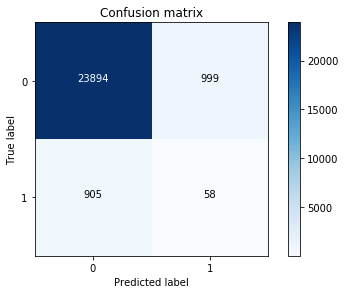

In [12]:
y_pred = lr_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[0,1]+cnf_matrix[1,1])))
print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/parinazfarajiparvar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished


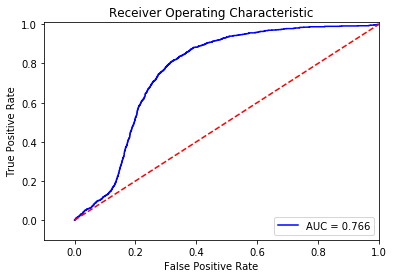

0.765732579469204

In [13]:
# ROC plot
from sklearn.metrics import auc, roc_auc_score, roc_curve


tmp = lr_best.fit(X_train_res, y_train_res.ravel())
y_pred_sample_score = tmp.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
roc_auc

In [14]:
# saving the result into the precision_recall matrix
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['LR'] = [precision, recall, f, roc_auc]

In [17]:
# 2 Random Forest
weight = {0:10, 1:1}

parameters = {'n_estimators':(20,25,40),
              'criterion':('gini','entropy'),
              'min_samples_split':(2,4,6),
              'min_samples_leaf':(1,2,3)}

model_2 = RandomForestClassifier(random_state=42, warm_start=False, class_weight=weight)
grid_obj = GridSearchCV(model_2, param_grid=parameters, scoring=score, verbose=1, n_jobs=2, cv=4)
grid_obj = grid_obj.fit(X_train_under, y_train_under)
RF_best = grid_obj.best_estimator_
RF_best.fit(X_train_under, y_train_under)
print (RF_best.get_params(), '\n')
print ("Tuned model has a training AUC score of {:.4f}.".format(predict_labels(RF_best, X_train_under, y_train_under)))
print ("Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(RF_best, X_test, y_test)))
print ("classification_report:\n", classification_report(y_test, RF_best.predict(X_test)))
print ("confusion_matrix\n", confusion_matrix(y_test, RF_best.predict(X_test)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   13.7s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   55.0s
[Parallel(n_jobs=2)]: Done 216 out of 216 | elapsed:  1.0min finished


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 10, 1: 1}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 

Tuned model has a training AUC score of 0.9914.
Tuned model has a testing AUC score of 0.7021.
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95     24893
           1       0.18      0.49      0.26       963

    accuracy                           0.90     25856
   macro avg       0.58      0.70      0.60     25856
weighted avg       0.95      0.90      0.92     25856

confusion_matrix
 [[22754  2139]
 [  491   472]]


Recall metric of label 1 in the testing dataset: 49.0134994807892%
True Negative rate for the testing dataset: 91.40722291407224%


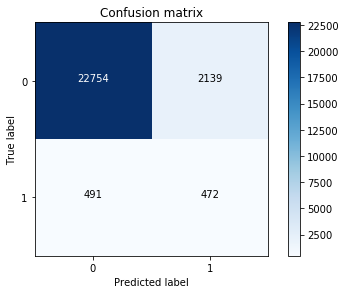

In [18]:
# Confusion Matrix for test-set
y_pred = RF_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

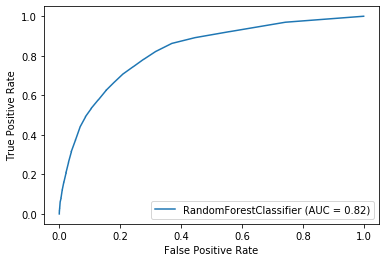

In [19]:
# Roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(RF_best, X_test, y_test)

In [20]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['RF'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,RF_best.predict(X_test), average='weighted')

0.6741388649962033

*** Reports Before Tuning Threshold*****
 precisoin = 0.18 
 recall=0.49 
 f1_score =0.26 
aggreagate error is 367.13%


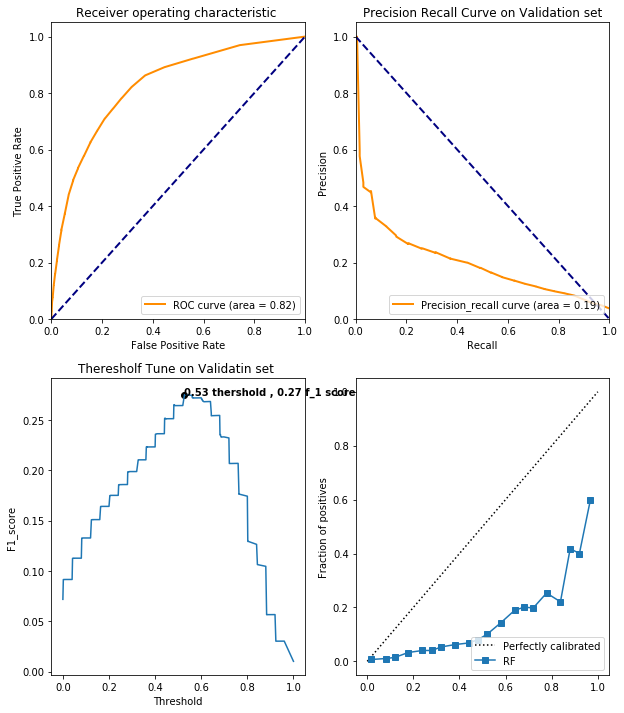

In [21]:
# plot the threshold for finding the best f-score
y_prob = RF_best.predict_proba(X_test)
metric_reports(y_test , y_pred , y_prob[:,1] , 'RF' )

The threshold/f_score plot shows the best threshold is 0.53, which is close enough to the default.

In [22]:
# 3 Gradient Boosting 

parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.1,1.0),
              'min_samples_split':(2,3,4),
              'min_samples_leaf':(1,2,3)}

model_3 = GradientBoostingClassifier(random_state=4, warm_start=False)
grid_obj = GridSearchCV(model_3, param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid_obj = grid_obj.fit(X_train_under, y_train_under)
boost_best = grid_obj.best_estimator_
boost_best.fit(X_train_under,y_train_under)
print (boost_best.get_params(), '\n')
print ("Tuned model has a training AUC score of {:.4f}.".format(predict_labels(boost_best, X_train_under, y_train_under)))
print ("Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(boost_best, X_test, y_test)))
print ("classification_report:\n", classification_report(y_test, boost_best.predict(X_test)))
print ("confusion_matrix\n", confusion_matrix(y_test, boost_best.predict(X_test)))

Fitting 4 folds for each of 54 candidates, totalling 216 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 216 out of 216 | elapsed:  2.2min finished


{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1.0, 'loss': 'exponential', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 4, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False} 

Tuned model has a training AUC score of 0.7296.
Tuned model has a testing AUC score of 0.6843.
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94     24893
           1       0.16      0.46      0.24       963

    accuracy                           0.89     25856
   macro avg       0.57      0.68      0.59     25856
weighted avg       0.95      0.89      0.92     25856

confusion_matrix
 [[22590  2303]
 [  519   444]]


Recall metric of label 1 in the testing dataset: 46.10591900311527%
True Negative rate for the testing dataset: 90.74840316554855%


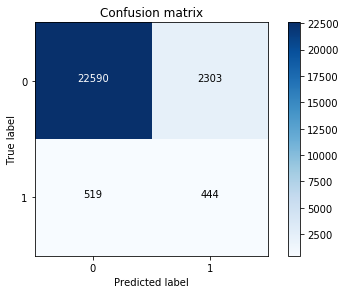

In [23]:
# Confusion Matrix for test-set
y_pred = boost_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

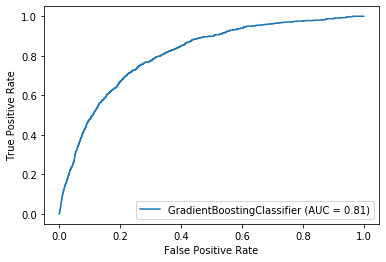

In [24]:
plot_roc_curve(boost_best, X_test, y_test)

In [25]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['GBoost'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,boost_best.predict(X_test), average='weighted')

0.6523420053113945

In [30]:
# 4 KNN
parameters = {'n_neighbors':(5,10,15,20),
              'weights':('uniform','distance'),
              'p':(1,2)}

model_4 = KNeighborsClassifier()
grid_obj = GridSearchCV(model_4, param_grid=parameters, scoring=score, verbose=1, n_jobs=2, cv=4)
grid_obj = grid_obj.fit(X_train_under, y_train_under)
knn_best = grid_obj.best_estimator_
print (knn_best.get_params(), '\n')
print ("Tuned model has a training AUC score of {:.4f}.".format(predict_labels(knn_best, X_train_under, y_train_under)))
print ("Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(knn_best, X_test, y_test)))
print ("classification_report:\n", classification_report(y_test, knn_best.predict(X_test)))
print ("confusion_matrix\n", confusion_matrix(y_test, knn_best.predict(X_test)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   32.2s
[Parallel(n_jobs=2)]: Done  64 out of  64 | elapsed:   45.9s finished


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'} 

Tuned model has a training AUC score of 0.9985.
Tuned model has a testing AUC score of 0.6514.
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96     24893
           1       0.20      0.36      0.25       963

    accuracy                           0.92     25856
   macro avg       0.58      0.65      0.61     25856
weighted avg       0.95      0.92      0.93     25856

confusion_matrix
 [[23463  1430]
 [  616   347]]


Recall metric of label 1 in the testing dataset: 36.033229491173415%
True Negative rate for the testing dataset: 94.25541316836059%


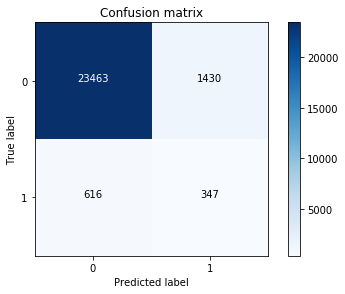

In [31]:
# Confusion Matrix for test-set
y_pred = knn_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

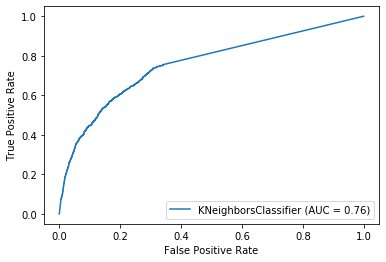

In [32]:
plot_roc_curve(knn_best, X_test, y_test)

In [33]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['KNN'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,boost_best.predict(X_test), average='weighted')

0.6523420053113945

In [ ]:
y_prob = knn_best.predict_proba(X_test)
metric_reports(y_test , y_pred , y_prob[:,1] , 'KNN' )


In [34]:
# 5 SVM
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold


# define model
model_5 = SVC(gamma='scale')
# define grid
balance = [{0:80,1:20}, {0:70,1:30}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model_5, param_grid=param_grid, n_jobs=3, cv=cv, scoring=score)
# execute the grid search
grid_result = grid.fit(X_train_under, y_train_under)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
SVM_best = grid_result.best_estimator_


print ("Tuned model has a training AUC score of {:.4f}.".format(predict_labels(SVM_best, X_train_under, y_train_under)))
print ("Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(SVM_best, X_test, y_test)))
print ("classification_report:\n", classification_report(y_test, SVM_best.predict(X_test)))
print ("confusion_matrix\n", confusion_matrix(y_test, SVM_best.predict(X_test)))

Best: 0.565672 using {'class_weight': {0: 70, 1: 30}}
Tuned model has a training AUC score of 0.5848.
Tuned model has a testing AUC score of 0.5864.
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     24893
           1       0.36      0.19      0.24       963

    accuracy                           0.96     25856
   macro avg       0.66      0.59      0.61     25856
weighted avg       0.95      0.96      0.95     25856

confusion_matrix
 [[24568   325]
 [  784   179]]


Recall metric of label 1 in the testing dataset: 18.587746625129803%
True Negative rate for the testing dataset: 98.69441208371832%


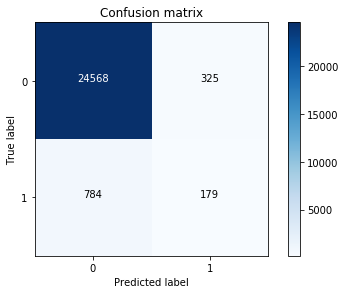

In [35]:
# Confusion Matrix for test-set
y_pred = SVM_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

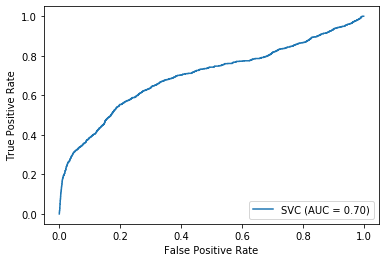

In [36]:
plot_roc_curve(SVM_best, X_test, y_test)

In [37]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['SVM'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,boost_best.predict(X_test), average='weighted')

0.6523420053113945

In [ ]:
y_prob = knn_best.predict_proba(X_test)
metric_reports(y_test , y_pred , y_prob[:,1] , 'KNN' )

In [ ]:
# 6 one-class SVM
from sklearn.svm import OneClassSVM
# define outlier detection model
one_svm_model = OneClassSVM(gamma='scale', nu=0.03)
# fit on majority class
X_train_one = X_train[y_train==0]
one_svm_model.fit(X_train_one)
# detect outliers in the test set
y_pred = one_svm_model.predict(X_test)
# mark inliers 1, outliers -1
y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
# calculate score
score = f1_score(y_test, y_pred, pos_label=-1)
print('F1 Score: %.3f' % score)
precision_recall_fscore_support(y_test, y_pred)

In [ ]:
print ("confusion_matrix\n", confusion_matrix(y_test, one_svm_model.predict(X_test)))

In [ ]:
# Confusion Matrix for test-set
y_pred = one_svm_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['One_SVM'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,boost_best.predict(X_test), average='weighted')

In [ ]:
# 8 XGBoost

In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from numpy import mean

balance = [{0:80,1:20}, {0:70,1:30}]
param_grid = dict(class_weight=balance)
# define model
XGB_model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=XGB_model, param_grid=param_grid, n_jobs=3, cv=cv, scoring=score)
# execute the grid search
grid_result = grid.fit(X_train_under, y_train_under)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
XGB_best = grid_result.best_estimator_
# evaluate model
scores = cross_val_score(XGB_best, X_train_under, y_train_under, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Best: 0.673384 using {'class_weight': {0: 80, 1: 20}}
Mean ROC AUC: 0.86485


In [39]:
print ("Tuned model has a training AUC score of {:.4f}.".format(predict_labels(XGB_best, X_train_under, y_train_under)))
print ("Tuned model has a testing AUC score of {:.4f}.".format(predict_labels(XGB_best, X_test, y_test)))
print ("classification_report:\n", classification_report(y_test, XGB_best.predict(X_test)))
print ("confusion_matrix\n", confusion_matrix(y_test, XGB_best.predict(X_test)))

Tuned model has a training AUC score of 0.6799.
Tuned model has a testing AUC score of 0.6825.
classification_report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     24893
           1       0.28      0.40      0.33       963

    accuracy                           0.94     25856
   macro avg       0.63      0.68      0.65     25856
weighted avg       0.95      0.94      0.94     25856

confusion_matrix
 [[23900   993]
 [  573   390]]


Recall metric of label 1 in the testing dataset: 40.49844236760124%
True Negative rate for the testing dataset: 96.01092676656089%


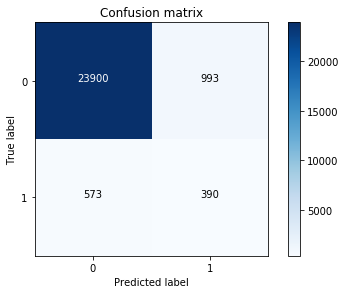

In [40]:
# Confusion Matrix for test-set
y_pred = XGB_best.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

print("Recall metric of label 1 in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
print("True Negative rate for the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

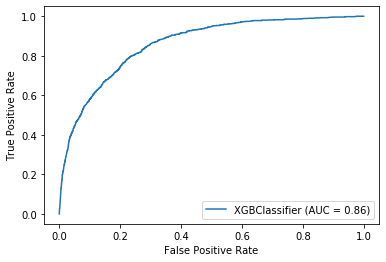

In [41]:
plot_roc_curve(XGB_best, X_test, y_test)

In [42]:
precision, recall, f, _ = precision_recall_fscore_support(y_test, y_pred)
Precision_Recall_Fscore['XGB'] = [precision, recall, f, roc_auc_score(y_test, y_pred)]
geometric_mean_score(y_test,boost_best.predict(X_test), average='weighted')

0.6523420053113945

In [44]:
# Save the Precision_Recall_Fscore
model_performance = pd.DataFrame.from_dict(Precision_Recall_Fscore , orient  = 'index' , columns = ['Precision','Recall','F_measure' , 'AUC'])    
model_performance.to_csv('model_performance.csv',index=True)